In [1]:
greetings = "Aybowan Sri Lanka!"
print(greetings)

Aybowan Sri Lanka!


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Model Evaluation and Refinement

In [2]:
from sklearn.model_selection import train_test_split

In [4]:
df = pd.read_csv("automobile.csv")
df.head().T

,0,1,2,3,4
symboling,3,3,1,2,2
normalized-losses,?,?,?,164,164
make,alfa-romero,alfa-romero,alfa-romero,audi,audi
fuel-type,gas,gas,gas,gas,gas
aspiration,std,std,std,std,std
num-of-doors,two,two,two,four,four
body-style,convertible,convertible,hatchback,sedan,sedan
drive-wheels,rwd,rwd,rwd,fwd,4wd
engine-location,front,front,front,front,front
wheel-base,88.6,88.6,94.5,99.8,99.4


In [217]:
x = df[["horsepower", "curb-weight", "engine-size", "highway-mpg"]]
y = df["price"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [53]:
# Function cross_val_score()

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
scores = cross_val_score(lr, x, y, cv = 3)
np.mean(scores)

0.6483637982542665

In [54]:
# Function cross_val_predict

from sklearn.model_selection import cross_val_predict
yhat = cross_val_predict(lr, x, y, cv = 3)
yhat[0:4]

array([13265.07358299, 13265.07358299, 16515.09239395,  9700.96565703])

### Model Evaluation on  module_5_auto dataset

In [137]:
df = pd.read_csv("module_5_auto.csv")
df.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,0,0,0,3,122,alfa-romero,std,two,convertible,rwd,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,1,1,1,3,122,alfa-romero,std,two,convertible,rwd,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,2,2,2,1,122,alfa-romero,std,two,hatchback,rwd,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,3,3,3,2,164,audi,std,four,sedan,fwd,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,4,4,4,2,164,audi,std,four,sedan,4wd,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [138]:
# First lets only use numeric data
df = df._get_numeric_data()
df.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
0,0,0,0,3,122,88.6,0.811148,0.890278,48.8,2548,...,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,0,1
1,1,1,1,3,122,88.6,0.811148,0.890278,48.8,2548,...,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,0,1
2,2,2,2,1,122,94.5,0.822681,0.909722,52.4,2823,...,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,0,1
3,3,3,3,2,164,99.8,0.848630,0.919444,54.3,2337,...,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,0,1
4,4,4,4,2,164,99.4,0.848630,0.922222,54.3,2824,...,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,0,1


In [139]:
# libraries for plotting
from ipywidgets import interact, interactive, fixed, interact_manual

In [140]:
# Functions for plotting
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')

    plt.show()
    plt.close()

In [12]:
def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    
    #training data 
    #testing data 
    # lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
 
    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()

**Training and Testing**

In [218]:
y_data = df["price"]
x_data = df.drop("price", axis = 1)        # drop price data in x data

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.10, random_state = 0)

print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples : 21
number of training samples: 180


In [142]:
# 40% test data
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.40, random_state = 0)

print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples : 81
number of training samples: 120


In [81]:
# we fit the model using the feature horsepower
lr.fit(x_train[["horsepower"]], y_train)

LinearRegression()

In [82]:
# Let's Calculate the R^2 on the test data:
lr.score(x_test[["horsepower"]], y_test)

0.7139364665406974

In [83]:
# we can see the R^2 is much smaller using the test data.
lr.score(x_train[["horsepower"]], y_train)

0.5754067463583004

In [84]:
# 90% test data
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_data, y_data, test_size=0.1, random_state=0)
print("Number of test samples :", x_test1.shape)
print("Number of training samples:", x_train1.shape)

Number of test samples : (21, 21)
Number of training samples: (180, 21)


In [86]:
# fit data
lr.fit(x_train[["horsepower"]], y_train)

LinearRegression()

In [88]:
# R Squared Score
lr.score(x_test[["horsepower"]], y_test)

0.7139364665406974

In [89]:
# cross validation
R_cross = cross_val_score(lr, x[["horsepower"]], y_data, cv = 4)
R_cross

array([0.7746232 , 0.51716687, 0.74785353, 0.04839605])

In [92]:
# Mean and Standard Deviation
print("The mean of the folds are", R_cross.mean(), "and the standard deviation is" , R_cross.std())

The mean of the folds are 0.522009915042119 and the standard deviation is 0.2911839444756029


In [94]:
# We can use negative squared error as a score by setting the parameter 'scoring' metric to 'neg_mean_squared_error'.
-1 * cross_val_score(lr ,x_data[['horsepower']], y_data, cv=4, scoring='neg_mean_squared_error')

array([20254142.84026704, 43745493.2650517 , 12539630.34014932,
       17561927.72247591])

In [95]:
# R_squared using folds
R_cross = cross_val_score(lr, x_data[["horsepower"]], y_data, cv = 2)
R_cross

array([0.59015621, 0.44319613])

In [97]:
# prediction
yhat_R_cross = cross_val_predict(lr, x_data[["horsepower"]], y_data, cv = 4)
yhat_R_cross[0:5]

array([14141.63807508, 14141.63807508, 20814.29423473, 12745.03562306,
       14762.35027598])

### Overfitting, Underfitting and Model Selection

In [99]:
lr = LinearRegression()
lr.fit(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_train)

LinearRegression()

In [100]:
# Prediction using training data
yhat_train = lr.predict(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_train[0:5]

array([38237.3225152 ,  8757.67570728, 16832.43125207, 16093.28264058,
       14757.89820098])

In [108]:
# Prediction using training data
yhat_test = lr.predict(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_test[0:5]

array([ 5114.7345989 , 10941.98915173, 20956.19697977, 20968.65125706,
       19966.75504097])

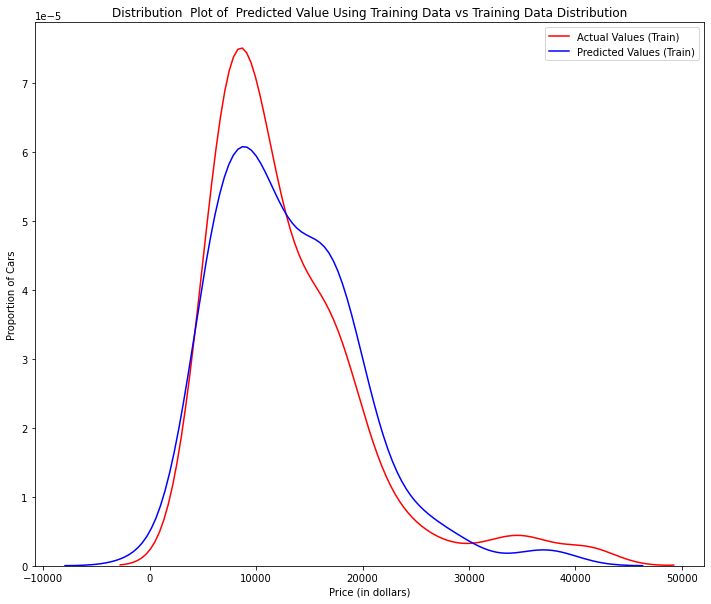

In [105]:
# Let's examine the distribution of the predicted values of the training data
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

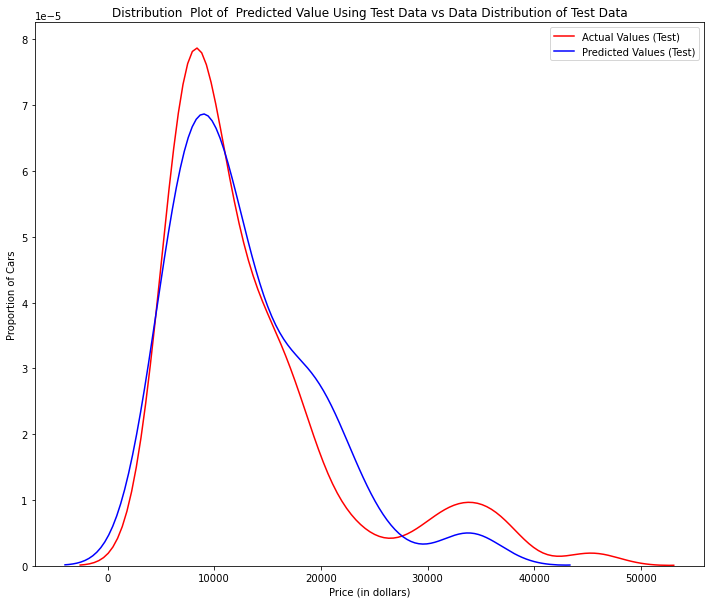

In [109]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,yhat_test,"Actual Values (Test)","Predicted Values (Test)",Title)

**Overfitting**

In [148]:
from sklearn.preprocessing import PolynomialFeatures

In [153]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.45, random_state = 0)

In [154]:
# We will perform a degree 5 polynomial transformation on the feature horse power
pr = PolynomialFeatures(degree=5)
x_train_pr = pr.fit_transform(x_train[['horsepower']])
x_test_pr = pr.fit_transform(x_test[['horsepower']])
pr

PolynomialFeatures(degree=5)

In [155]:
# Now let's create a linear regression model "poly" and train it.
poly = LinearRegression()
poly.fit(x_train_pr, y_train)

LinearRegression()

In [156]:
# prediction
yhat = poly.predict(x_test_pr)
yhat[0:5]

array([ 6728.63702958,  7307.96989706, 12213.77721798, 18893.28623041,
       19995.9928222 ])

In [157]:
# Predictd vs Actual
print("Predicted values:", yhat[0:4])
print("True values:", y_test[0:4].values)

Predicted values: [ 6728.63702958  7307.96989706 12213.77721798 18893.28623041]
True values: [ 6295. 10698. 13860. 13499.]


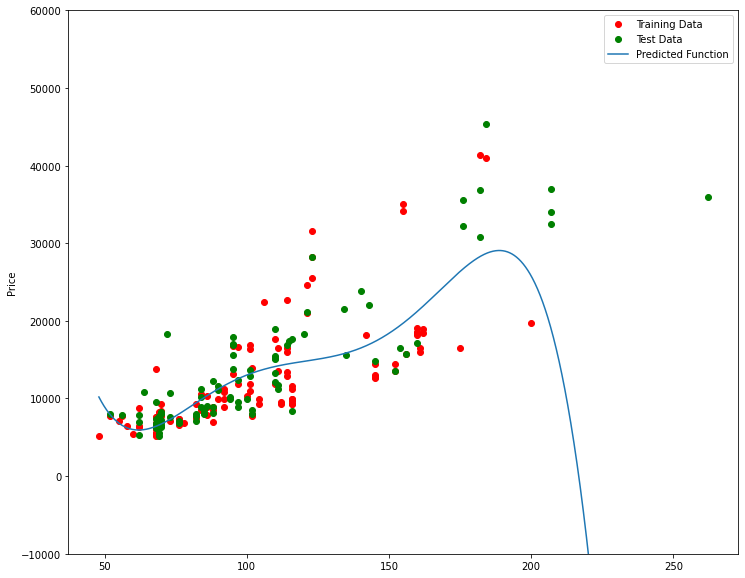

In [158]:
PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train, y_test, poly, pr)

In [160]:
# R^2 training data
poly.score(x_train_pr, y_train)

0.5567716901606526

In [161]:
# R^2 testing data
poly.score(x_test_pr, y_test) # overfitting

-29.871300058119818

In [162]:
# Different R-Squared values

Rsqu_test = []
order = [1, 2, 3, 4]
for n in order:
    pf = PolynomialFeatures(degree = n)
    x_train_pf = pf.fit_transform(x_train[["horsepower"]])
    x_test_pf  = pf.fit_transform(x_test[["horsepower"]])
    lr.fit(x_train_pf, y_train)
    Rsqu_test.append(lr.score(x_test_pf, y_test))
    
print(Rsqu_test)

[0.7325101750243117, 0.74058587106999, 0.7406204232755499, 0.40639664163300804]


In [163]:
def f(order, test_data):
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=test_data, random_state=0)
    pr = PolynomialFeatures(degree=order)
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    x_test_pr = pr.fit_transform(x_test[['horsepower']])
    poly = LinearRegression()
    poly.fit(x_train_pr,y_train)
    PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train,y_test, poly, pr)

In [164]:
interact(f, order=(0, 6, 1), test_data=(0.05, 0.95, 0.05))

interactive(children=(IntSlider(value=3, description='order', max=6), FloatSlider(value=0.45, description='tes…

<function __main__.f(order, test_data)>

In [167]:
pr1 = PolynomialFeatures(degree = 2)
pr1

PolynomialFeatures()

In [168]:
# Transform the training and testing samples
x_train_pr1 = pr1.fit_transform(x_train[["horsepower", "curb-weight", "engine-size", "highway-mpg"]])
x_test_pr1 = pr1.fit_transform(x_test[["horsepower", "curb-weight", "engine-size", "highway-mpg"]])

In [172]:
# New Feature Dimensions
x_train_pr1.shape

(110, 15)

In [174]:
# Create a linear regression model "poly1" and train the object using the method "fit" using the polynomial features
poly1 = LinearRegression()
poly1.fit(x_train_pr1, y_train)

LinearRegression()

In [177]:
yhat_predict = poly1.predict(x_test_pr1)
yhat_predict[0:5]

array([ 6303.0291783 , 10402.87148107, 20516.37185636, 19273.87340838,
       20555.51694568])

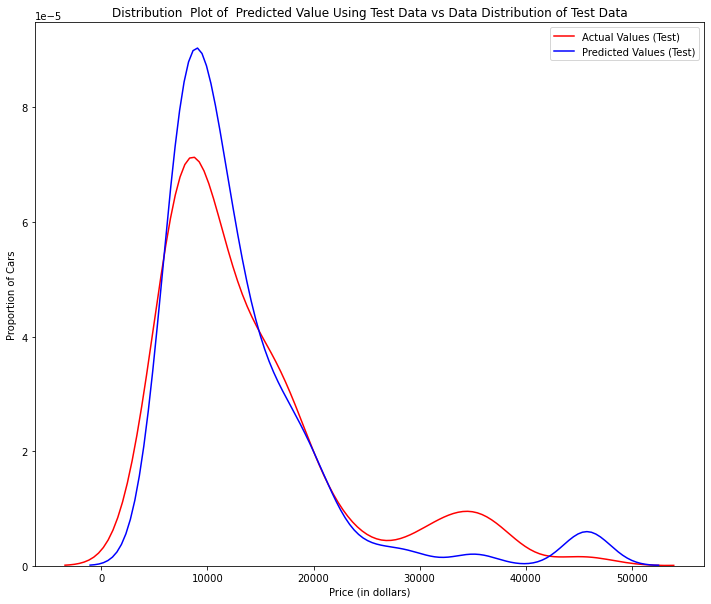

In [179]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'

DistributionPlot(y_test, yhat_predict, "Actual Values (Test)", "Predicted Values (Test)", Title)

### Ridge Regression

**alpha ---> Train ---> Predict ---> R^2 ---> output**

In [216]:
# Ridge Regression
RigeModel = Ridge(alpha = 10)
RigeModel.fit(x_train_pr, y_train)
RigeModel.score(x_test_pr, y_test)

0.6941673281626133

In [208]:
from sklearn.linear_model import Ridge
RidgeModel = Ridge(alpha = 0.1)
RidgeModel.fit(x, y)
yhat = RidgeModel.predict(x)
yhat[0:4]

array([13699.11634983, 13699.11634983, 19051.65077844, 10620.36466281])

In [207]:
pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])
x_test_pr=pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])

In [182]:
from sklearn.linear_model import Ridge

In [183]:
# Let's create a Ridge regression object, setting the regularization parameter to 0.1
RidgeModel = Ridge(alpha = 0.1)

In [184]:
# Like regular regression, you can fit the model using the method fit
RidgeModel.fit(x_train_pr, y_train)

D:\New folder\anaconda\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.02972e-16): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Ridge(alpha=0.1)

In [186]:
# prediction
yhat = RidgeModel.predict(x_test_pr)                      

array([ 6567.83081933,  9597.97151399, 20836.22326844, 19347.69543464,
       21402.65500379])

In [189]:
print("Predicted:", yhat[0:4])
print("test set:", y_test[0:4].values)

Predicted: [ 6567.83081933  9597.97151399 20836.22326844 19347.69543464]
test set: [ 6295. 10698. 13860. 13499.]


In [195]:
# We select the value of Alpha that minimizes the test error, for example, we can use a for loop.
Rsqu_test = []
Rsqu_train = []
dummy1 = []
Alpha = np.array(range(0, 1000, 10))
for alpha in Alpha:
    RigeModel = Ridge(alpha = alpha)
    RigeModel.fit(x_train_pr, y_train)
    Rsqu_test.append(RigeModel.score(x_test_pr, y_test))
    Rsqu_train.append(RigeModel.score(x_train_pr, y_train))

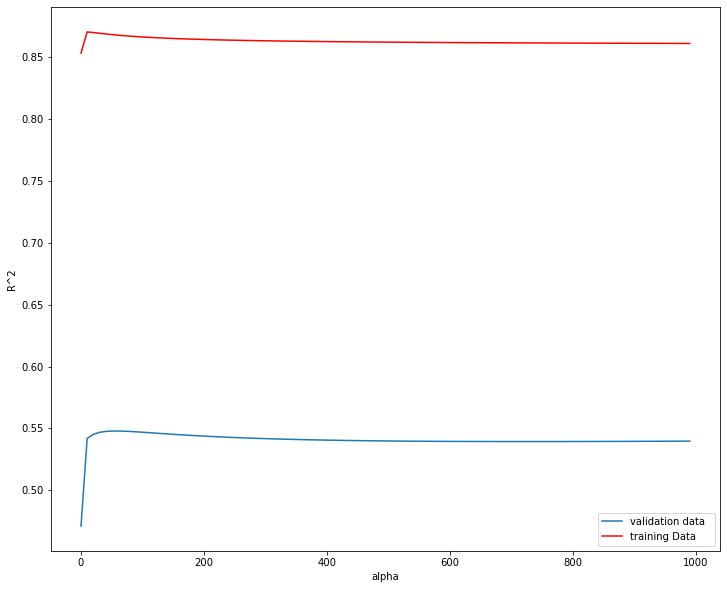

In [196]:
# Plot
width = 12
height = 10
plt.figure(figsize=(width, height))

plt.plot(Alpha,Rsqu_test, label='validation data  ')
plt.plot(Alpha,Rsqu_train, 'r', label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()

### Grid Search

In [219]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

parameters = [{"alpha": [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 1000000]}]
RR = Ridge()

# best parameter
Grid = GridSearchCV(RR, parameters, cv = 4)
Grid.fit(x, y)
Grid.best_estimator_

Ridge(alpha=10000)

In [220]:
# score
scores = Grid.cv_results_
scores["mean_test_score"]

array([0.66459248, 0.66459305, 0.66459827, 0.66465008, 0.66513615,
       0.66808959, 0.67249168, 0.6569726 , 0.60142652])

In [221]:
parameters = [{"alpha": [0.001, 0.1, 1, 10, 100], "normalize": [True, False]}]
RR = Ridge()

# best parameter
Grid = GridSearchCV(RR, parameters, cv = 4)
Grid.fit(x, y)
Grid.best_estimator_

# score
scores = Grid.cv_results_
scores["mean_test_score"]

array([0.66516228, 0.66459248, 0.69342286, 0.66459305, 0.69000509,
       0.66459827, 0.32125534, 0.66465008, 0.01692457, 0.66513615])